In [39]:
# import libraries
import os
import time
import math
import random
import numpy as np
import pandas as pd
import pickle5 as pickle
import matplotlib.pyplot as plt

import dashboard as dash

In [2]:
data_path = '../../data/customer/WM-unlabeled-random50-314.pkl'
predictions_path = '../results/yutandem-224thin2-unlabeled-random314.pkl'

data, lot_count = dash.generate_dashboard_data(data_path=data_path, predictions_path=predictions_path)
data.head()

Augmented results dataset shape: (1250, 9)
Number of lots in lot count dictionary: 50


,ID,waferMap,dieSize,lotName,waferIndex,pred_labels,pred_prob,pred2_labels,pred2_prob
0,29288,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3031,lot3405,1,8,99.913067,8,0.0
1,29289,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3031,lot3405,2,8,99.999774,8,0.0
2,29290,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3030,lot3405,3,8,99.999964,8,0.0
3,29291,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3030,lot3405,4,8,99.999976,8,0.0
4,29292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3031,lot3405,5,8,95.409411,8,0.0


In [4]:
# per wafer statistics
pct_none = len(data[data.pred_labels == 8]) / len(data) * 100
print(f'Percent of wafers predicted with no defects: {pct_none:.2f}%')

pct_def = len(data[data.pred_labels != 8]) / len(data) * 100
print(f'Percent of wafers predicted with defects: {pct_def:.2f}%')

Percent of wafers predicted with no defects: 89.92%
Percent of wafers predicted with defects: 10.08%


In [5]:
# lot statistics
pct_none_lot = len([x for x, y in lot_count.items() if y == 0]) / len(lot_count) * 100
print(f'Percent of lots predicted with no defective wafers: {pct_none_lot:.0f}%')

pct_def_lot = len([x for x, y in lot_count.items() if y > 0]) / len(lot_count) * 100
print(f'Percent of lots predicted with at least one defective wafer: {pct_def_lot:.0f}%')

pct_all_lot = len([x for x, y in lot_count.items() if y == 25]) / len(lot_count) * 100
print(f'Percent of lots predicted to be all defective: {pct_all_lot:.0f}%')

Percent of lots predicted with no defective wafers: 56%
Percent of lots predicted with at least one defective wafer: 44%
Percent of lots predicted to be all defective: 4%


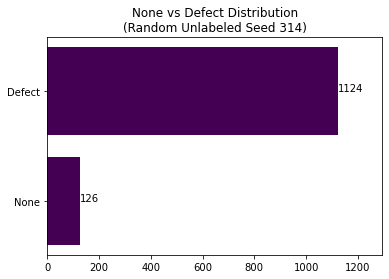

In [13]:
# distribution of labels
dash.defect_distribution(data, note='Random Unlabeled Seed 314', mode='detect', color='#440154FF')

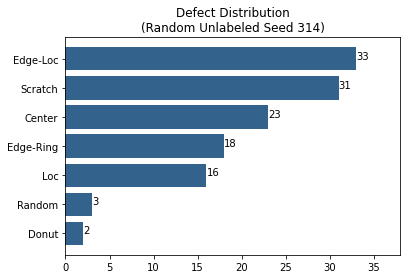

In [14]:
# distribution of labels
dash.defect_distribution(data, note='Random Unlabeled Seed 314', mode='classify', color='#33638DFF')

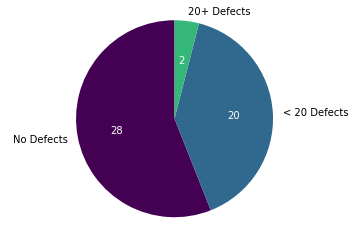

In [9]:
dash.visualize_defective_lots(lot_count)

lot15386


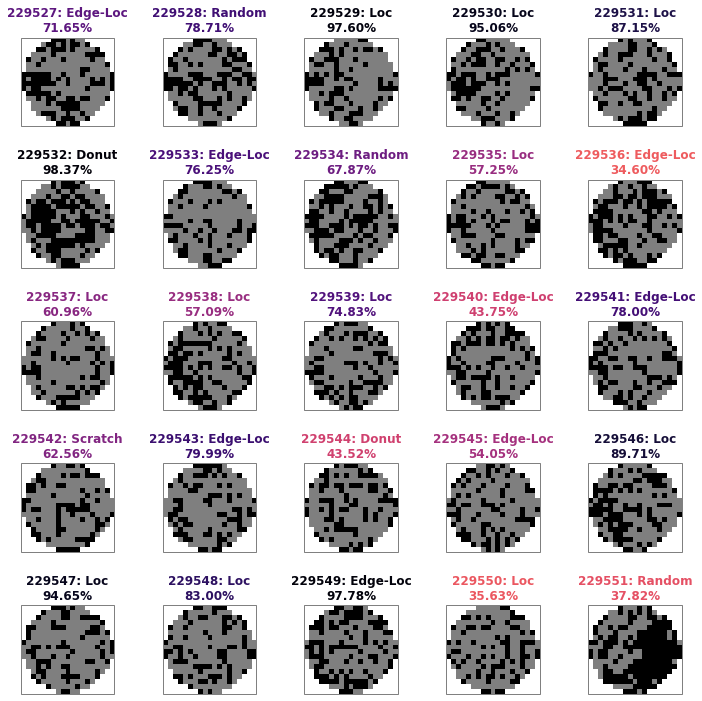

In [24]:
dash.plot_lot(data, 'lot15386', resize=False)

lot20759


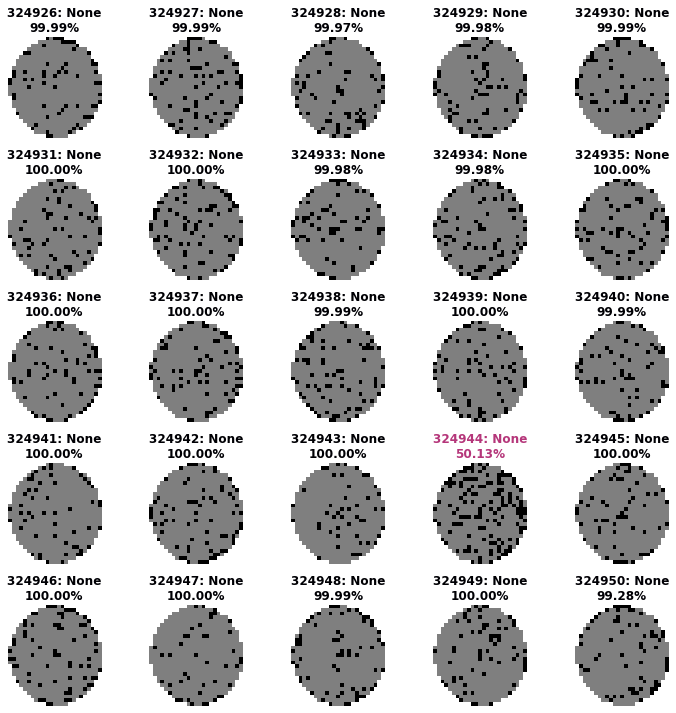

In [27]:
dash.plot_lot(data, 'lot20759', resize=False)

lot34809


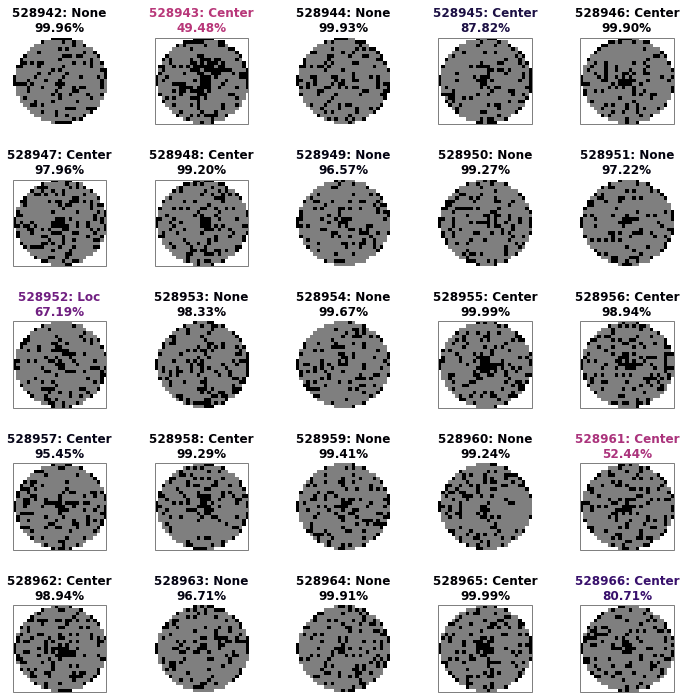

In [28]:
dash.plot_lot(data, 'lot34809')

lot21946


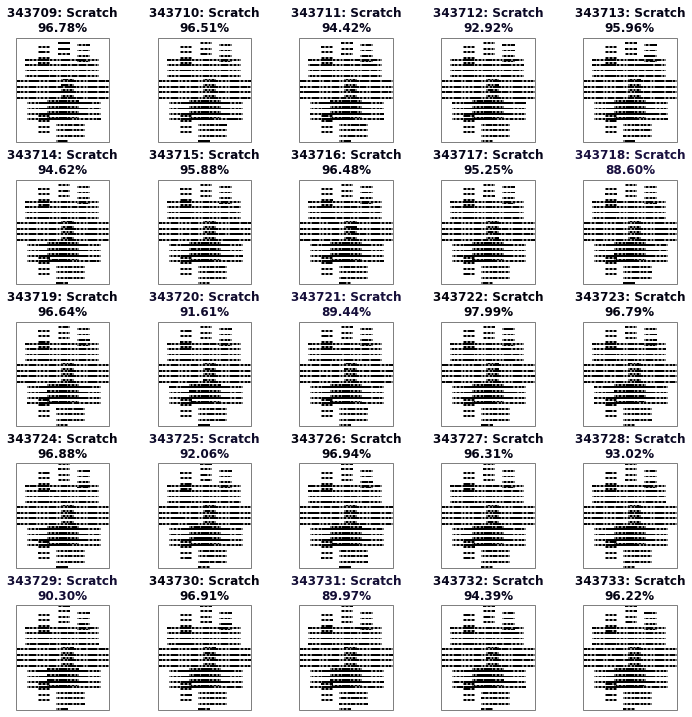

In [32]:
dash.plot_lot(data, 'lot21946')

Wafer ID: 229544
Predicted label: Donut (43.52%)
Second Prediction: Scratch (25.09%)


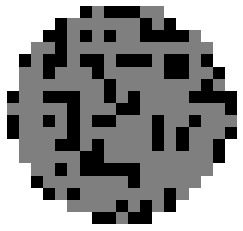

In [60]:
# plot specific waferMap by ID
i = data[data.ID == 229544].index[0]
plt.imshow(data.waferMap[i], interpolation='none', cmap='gray_r')
plt.axis('off')

fail_dict = {8:'None', 0:'Loc', 1:'Edge-Loc', 2:'Center', 3:'Edge-Ring', 
             4:'Scratch', 5:'Random', 6:'Near-full', 7:'Donut'}

print(f'Wafer ID: {data.ID[i]}')
print(f'Predicted label: {fail_dict[data.pred_labels[i]]} ({data.pred_prob[i]:.2f}%)')
print(f'Second Prediction: {fail_dict[data.pred2_labels[i]]} ({data.pred2_prob[i]:.2f}%)')
pass

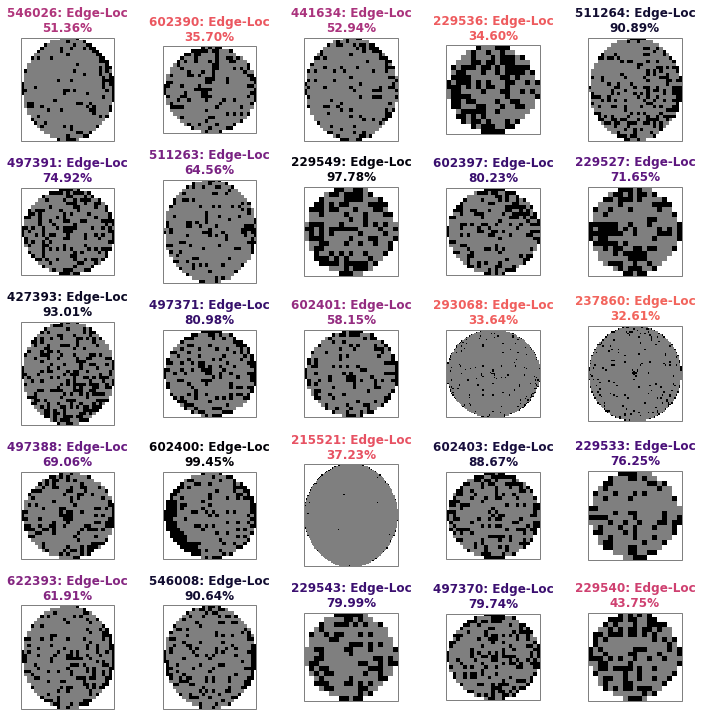

In [68]:
# random samples of defect types
defects = [i for i in range(len(data)) if data.iloc[i].pred_labels == 1]
random_n = random.sample(defects, 25)
dash.plot_list(data, random_n)